# matplot 그래프

In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips = tips.rename({'sex':'gender'}, axis=1)
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
import matplotlib.pyplot as plt

# 히스토그램

: 1개 변수의 분포와 빈도 파악

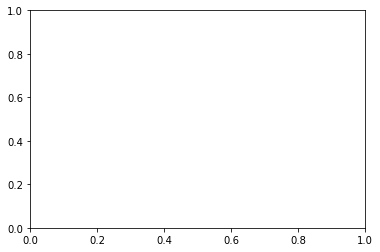

In [4]:
#중첩 히스토그램
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1) 

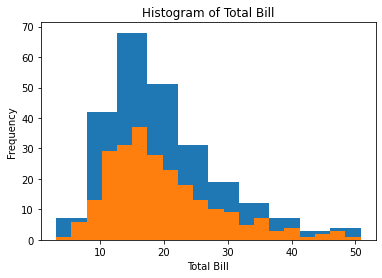

In [5]:
axes1.hist(tips['total_bill'], bins=10)
axes1.hist(tips['total_bill'], bins=20) #sub plot => 같은 plot에 중첩되어 나타남
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Frequency')

fig

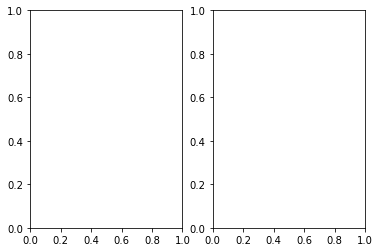

In [6]:
fig = plt.figure()
axes3 = fig.add_subplot(1,2,1) #행, 열, 번째
axes4 = fig.add_subplot(1,2,2)

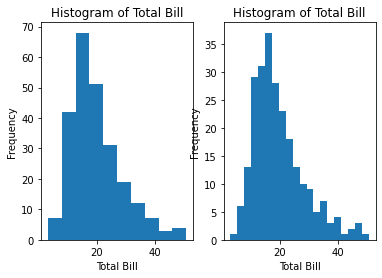

In [7]:
axes3.hist(tips['total_bill'], bins=10)
axes4.hist(tips['total_bill'], bins=20)
axes3.set_title('Histogram of Total Bill')
axes3.set_xlabel('Total Bill')
axes3.set_ylabel('Frequency')
axes4.set_title('Histogram of Total Bill')
axes4.set_xlabel('Total Bill')
axes4.set_ylabel('Frequency')

fig

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

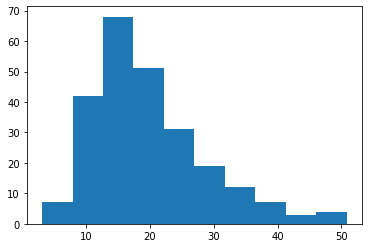

In [8]:
plt.hist(tips['total_bill'], bins=10) #중첩 없이 그래프 그리기

# 산점도
: 2개 변수의 분포

Text(0, 0.5, 'Tip')

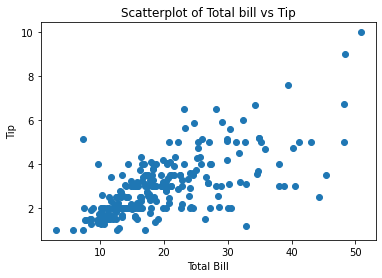

In [9]:
plt.scatter(tips['total_bill'], tips['tip'])
plt.title('Scatterplot of Total bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

# 박스플롯
: 주로 양적변수를 명확하게 구분되는 질적변수로 구분하여 분포를 파악

Text(0, 0.5, 'Tip')

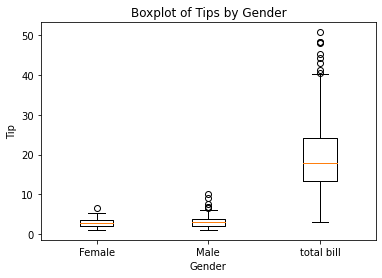

In [16]:
plt.boxplot(
    [tips[tips['gender'] == 'Female']['tip'],
    tips[tips['gender'] == 'Male']['tip']],
    labels = ['Female', 'Male']
)
plt.title('Boxplot of Tips by Gender')
plt.xlabel('Gender')
plt.ylabel('Tip')

# 다변량 산점도
: 산점도 색을 지정하기 위해서는 정수 표현 필요

In [17]:
def recode_gender(gender):
    if gender == 'Female':
        return 0
    else:
        return 1

tips['gender_color'] = tips['gender'].apply(recode_gender)
#apply(함수) => 데이터 프레임의 열(시리즈)에 함수를 브로드캐스팅(적용)

tips.head()

,total_bill,tip,gender,smoker,day,time,size,gender_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


Text(0, 0.5, 'Tip')

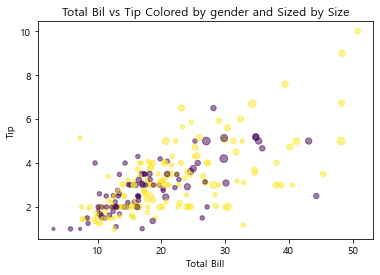

In [35]:
plt.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10, #인원수에 따른 점 사이즈
    c = tips['gender_color'],
    alpha = 0.5, #점 색의 투명도
    label = tips['gender']
)
plt.title('Total Bil vs Tip Colored by gender and Sized by Size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

Text(0, 0.5, 'Tip')

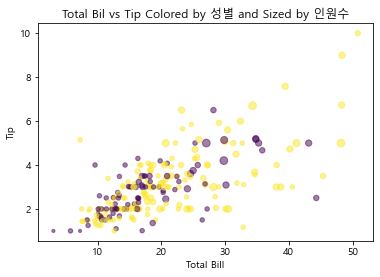

In [31]:
#matplotlib에서 한글 사용시 컴퓨터 os에 존재하는 한글 font를 가져와서 사용
import platform
 
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...') 
    
plt.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10,
    c = tips['gender_color'],
    alpha = 0.5, 
    label = tips['gender']
)
plt.title('Total Bil vs Tip Colored by 성별 and Sized by 인원수')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

Text(0, 0.5, 'Tip')

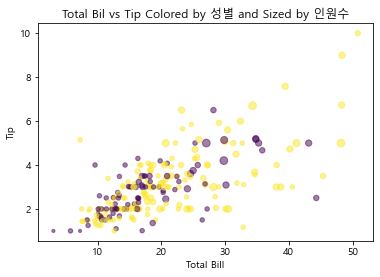

In [33]:
plt.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10, #인원수에 따른 점 사이즈
    c = tips['gender_color'],
    alpha = 0.5, #점 색의 투명도
    label = tips['gender']
)
plt.title('Total Bil vs Tip Colored by 성별 and Sized by 인원수')
plt.xlabel('Total Bill')
plt.ylabel('Tip')


#### seaborn 패키지

# 다양한 단변량 그래프

In [55]:
import warnings
warnings.filterwarnings(action = 'ignore')

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

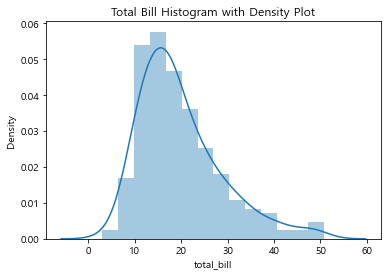

In [56]:
#히스토그램과 밀집분포곡선
sns.distplot(tips['total_bill']) #distplot : 밀집도(너비 1) + 분포곡선
plt.title('Total Bill Histogram with Density Plot')

Text(0.5, 1.0, 'Total Bill Frequency Plot')

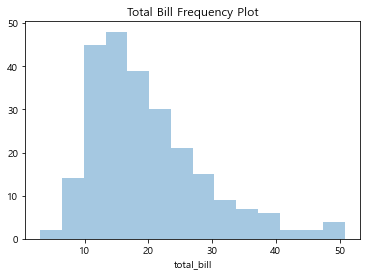

In [65]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False) #밀집x, 분포곡선x
ax.set_title("Total Bill Frequency Plot")

Text(0.5, 1.0, 'Total Bill Density Plot')

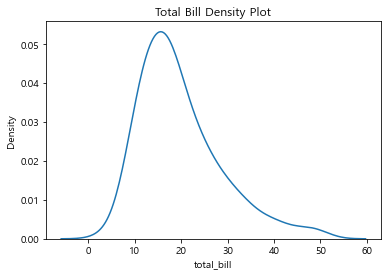

In [63]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False) #분포곡선만
ax.set_title("Total Bill Density Plot")

Text(0.5, 1.0, 'Total Bill Frequency Plot with Density Plot')

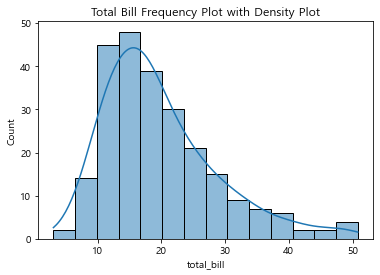

In [64]:
sns.histplot(tips['total_bill'], kde=True) #빈도표, 분포곡선
plt.title('Total Bill Frequency Plot with Density Plot')

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

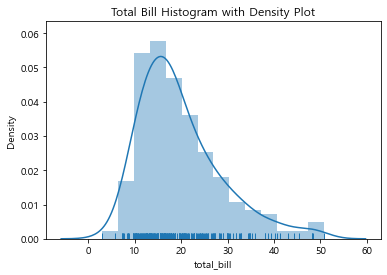

In [61]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True) #밀집정도 표현
ax.set_title("Total Bill Histogram with Density and Rug Plot")

Text(0, 0.5, 'Frequency')

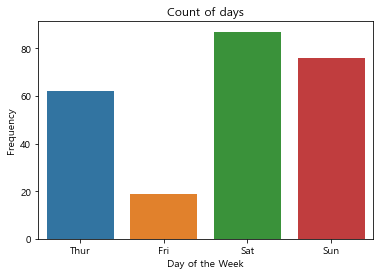

In [67]:
#countplot
sns.countplot('day', data=tips)
plt.title('Count of days')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')

# 다양한 이변량 그래프

Text(0, 0.5, 'Tip')

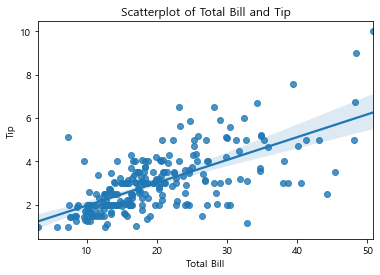

In [68]:
#regplot : 산점도 + 회귀선 + 예측선
ax = plt.figure()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

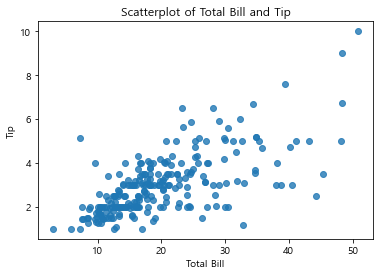

In [70]:
ax = plt.figure()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

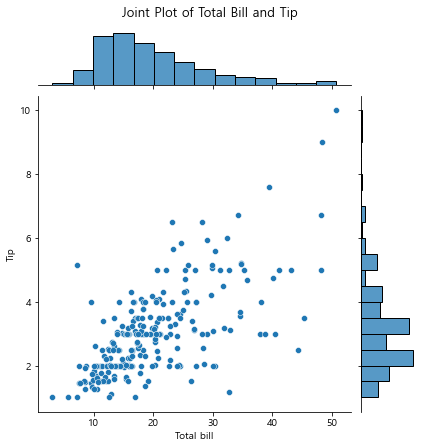

In [74]:
#jointplot : 산점도와 히스토그램을 한번에 
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=13, y=1.03)

<Figure size 432x288 with 0 Axes>

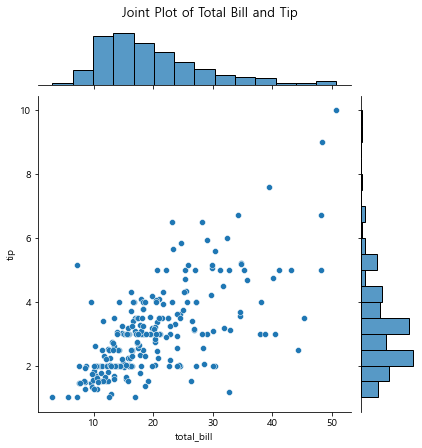

In [77]:
ax = plt.figure()
ax = sns.jointplot(x='total_bill', y='tip', data=tips)
ax.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=13, y=1.03)
plt.show()

<Figure size 432x288 with 0 Axes>

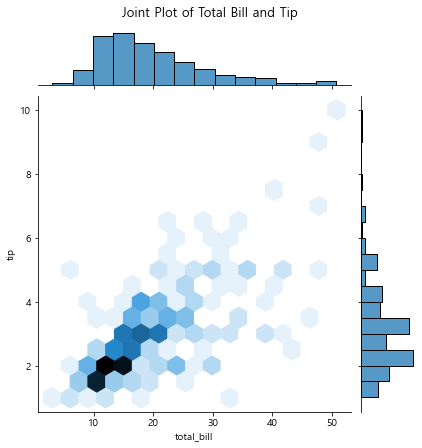

In [81]:
#hexbin : 육각그래프, 점이 겹쳐 구분하기 어려울 경우, 색으로 분포 파악 가능
ax = plt.figure()
ax = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
ax.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=13, y=1.03)
plt.show()

Text(0, 0.5, 'Tip')

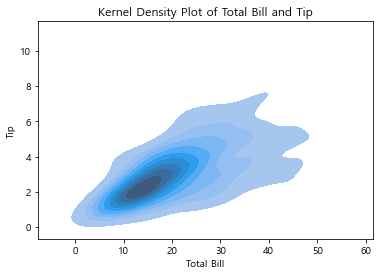

In [83]:
#kdeplot : 이차원 밀집도
ax = plt.figure()
ax = sns.kdeplot(data = tips['total_bill'],
                data2 = tips['tip'],
                shade = True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Average total bill')

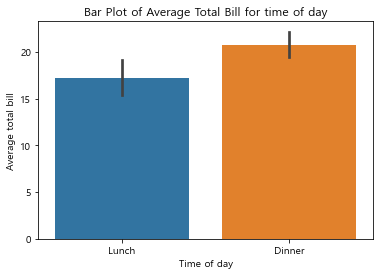

In [85]:
#barplot : y의 평균을 계산하여 막대그래프화
ax = plt.figure()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar Plot of Average Total Bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

Text(0, 0.5, 'Total bill')

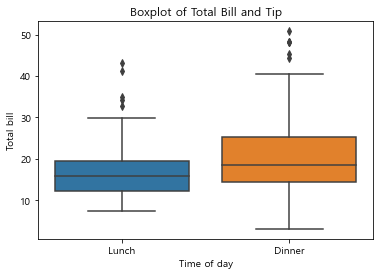

In [87]:
#boxplot : 사분위수, 최대최소, 이상치 확인 가능, 중앙값 중심으로 분포 확인
ax = plt.figure()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of Total Bill and Tip')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total bill')

Text(0, 0.5, 'Total bill')

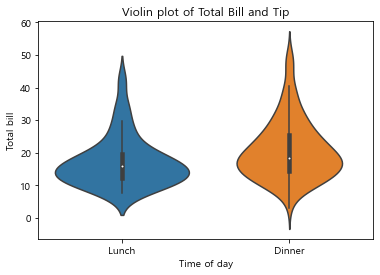

In [88]:
#boxplot : 데이터의 분산 파악하기 좋음, 평균값을 중심으로 분포 확인
ax = plt.figure()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of Total Bill and Tip')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total bill')

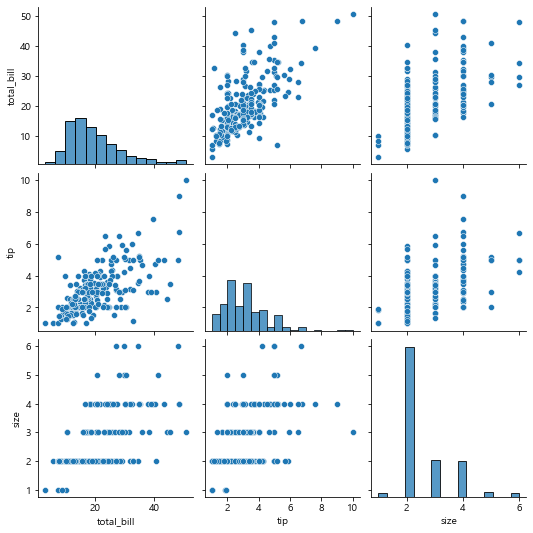

In [89]:
#pairplot
sns.pairplot(tips)

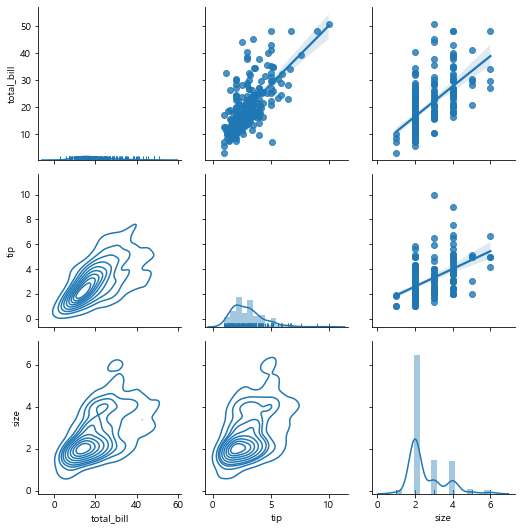

In [92]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot) #산점도+회귀선
pair_grid = pair_grid.map_lower(sns.kdeplot) #이차원 밀집도
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) #히스토그램+밀집곡선+양탄자

# 다변량 그래프

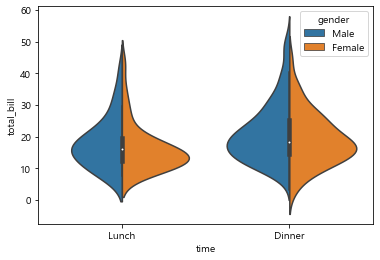

In [93]:
ax = plt.figure()
ax = sns.violinplot(x='time', y='total_bill', hue='gender', data=tips, split=True)
plt.show()

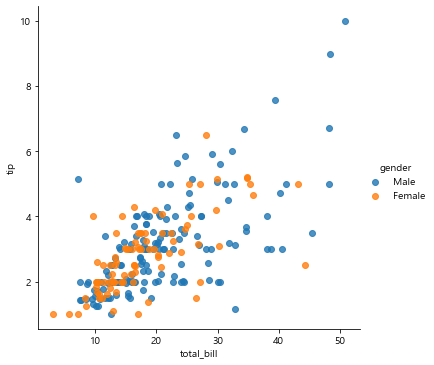

In [97]:
#lmplot : 질적변수로 범주를 나눠 산점도 그릴 수 있음
sns.lmplot(x='total_bill', y='tip', data=tips, hue='gender', fit_reg=False)
plt.show()

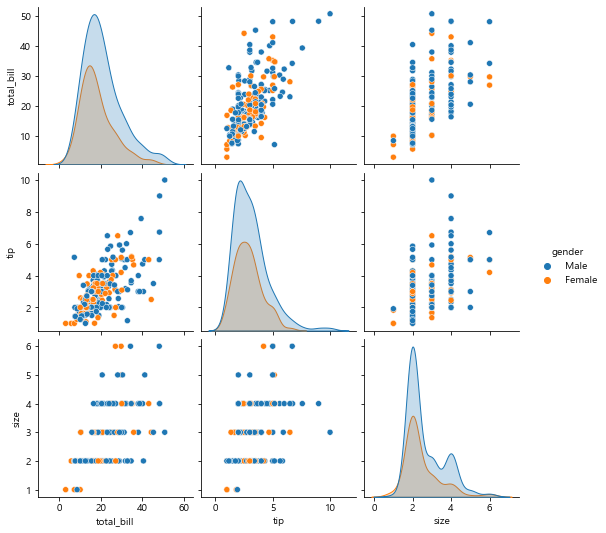

In [99]:
sns.pairplot(tips, hue='gender')
plt.show()

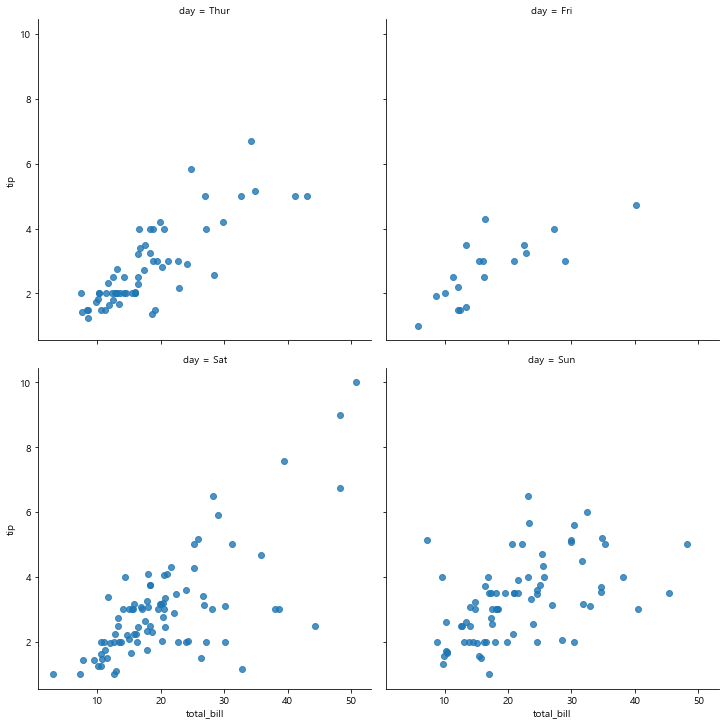

In [102]:
sns.lmplot(x='total_bill', y='tip', data=tips,
          fit_reg=False, col='day', col_wrap=2) #col:나눠그릴 범주형변수
plt.show()

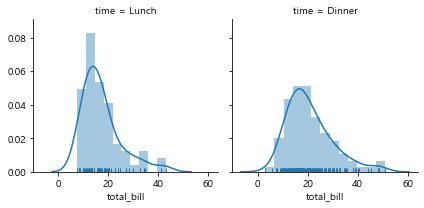

In [108]:
#FacetGrid : 그룹별 그래프
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)
plt.show()

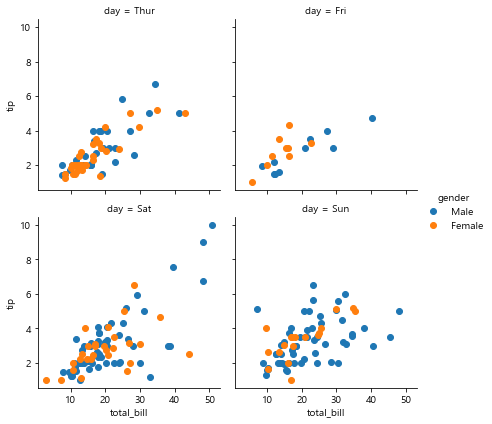

In [105]:
facet = sns.FacetGrid(tips, col='day', hue='gender', col_wrap=2)
facet.map(plt.scatter, 'total_bill', 'tip')
facet.add_legend()
plt.show()

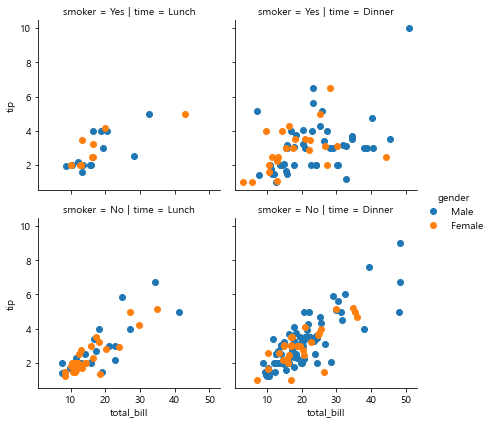

In [110]:
facet = sns.FacetGrid(tips, row='smoker', col='time', hue='gender')
facet.map(plt.scatter, 'total_bill', 'tip')
facet.add_legend()
plt.show()

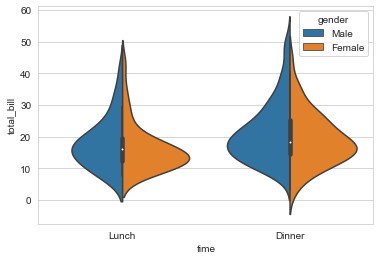

In [118]:
sns.set_style('whitegrid')
ax = plt.subplot()
ax = sns.violinplot(x='time', y='total_bill', data=tips, hue='gender', split=True)

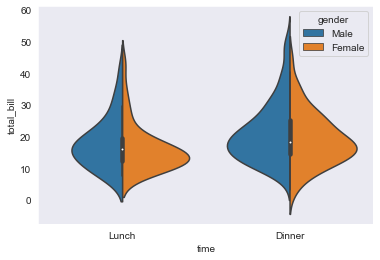

In [120]:
sns.set_style('dark')
ax = sns.violinplot(x='time', y='total_bill', data=tips, hue='gender', split=True)
plt.show()

# 데이터프레임과 시리즈 그래프

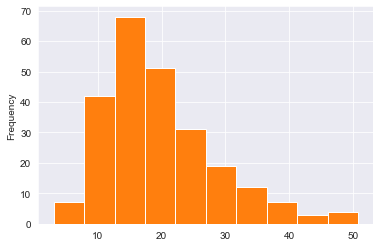

In [124]:
tips['total_bill'].plot.hist()

sns.set_style('darkgrid')
plt.subplot()
tips['total_bill'].plot.hist()
plt.show()

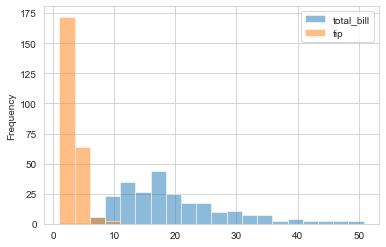

In [145]:
tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20)
plt.show()

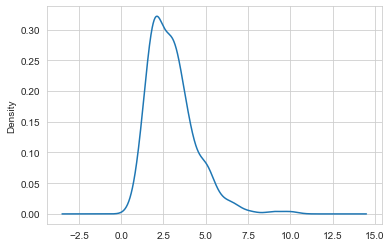

In [175]:
sns.set_style('whitegrid')
tips['tip'].plot.kde()
plt.show()

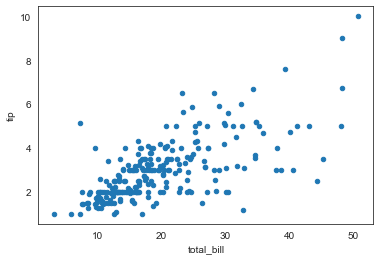

In [141]:
sns.set_style('white')
# ax = plt.subplot()
# tips.plot.scatter(x='total_bill', y='tip', ax=ax)
tips.plot.scatter(x='total_bill', y='tip')
plt.show()

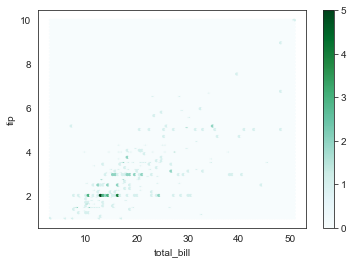

In [171]:
sns.set_style('white')
ax = plt.subplot()
tips.plot.hexbin(x='total_bill', y='tip', ax=ax) #x축 라벨 출력
plt.show()

<Figure size 432x288 with 0 Axes>

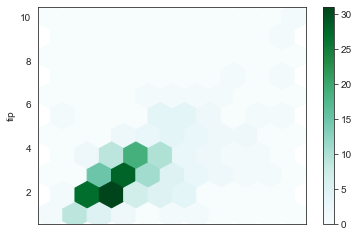

In [160]:
sns.set_style('white')
plt.figure()
tips.plot.hexbin(x='total_bill', y='tip', gridsize=10)
plt.show()

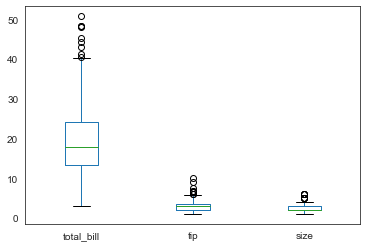

In [169]:
tips.plot.box() #알아서 수치형 변수만 박스플롯
plt.show()